In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
from sklearn import metrics

In [4]:
from struct import unpack

In [26]:
def loadmnist(imagefile, labelfile):
    images=open(imagefile,'rb')
    labels=open(labelfile,'rb')
    images.read(4)
    number_of_images=images.read(4)
    #print(number_of_images)
    number_of_images=unpack('>I',number_of_images)[0]
    rows=images.read(4)
    rows=unpack('>I',rows)[0]
    cols=images.read(4)
    cols=unpack('>I',cols)[0]
    labels.read(4)
    N=labels.read(4)
    N=unpack('>I',N)[0]
    x=np.zeros((N, rows*cols),dtype=np.uint8)
    y=np.zeros(N,dtype=np.uint8)
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel=images.read(1)
            tmp_pixel=unpack('>B', tmp_pixel)[0]
            x[i][j]=tmp_pixel
        tmp_label=labels.read(1)
        y[i]=unpack('>B',tmp_label)[0]
    images.close()
    labels.close()
    return(x,y)
    

In [28]:
train_img, train_lbl=loadmnist('C:/Users/abi_r/data/train-images.idx3-ubyte', 'C:/Users/abi_r/data/train-labels.idx1-ubyte')
test_img, test_lbl=loadmnist('C:/Users/abi_r/data/t10k-images.idx3-ubyte', 'C:/Users/abi_r/data/t10k-labels.idx1-ubyte')

In [30]:
print(train_img.shape)

(60000, 784)


In [32]:
print(train_lbl.shape)

(60000,)


In [33]:
print(test_img.shape)

(10000, 784)


In [34]:
print(test_lbl.shape)

(10000,)


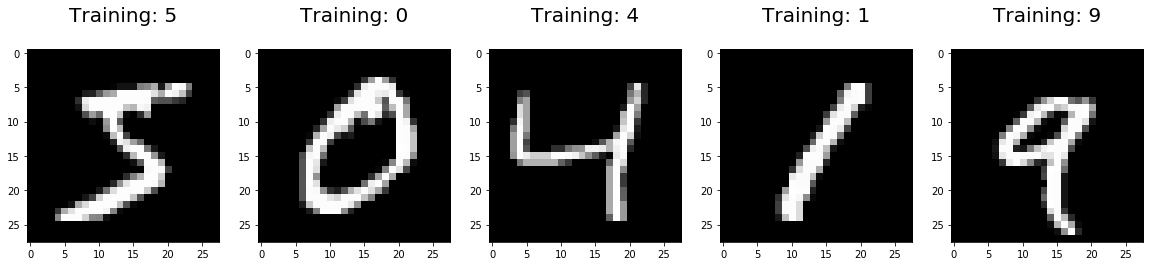

In [36]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(28,28)),cmap=plt.cm.gray)
    plt.title('Training: %i\n'%label,fontsize=20)

In [38]:
print(train_img[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logi=LogisticRegression(solver='lbfgs')

In [42]:
logi.fit(train_img,train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
logi.predict(test_img[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

In [44]:
test_lbl[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [45]:
logi.predict(test_img[0:])

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
score=logi.score(test_img,test_lbl)

In [36]:
print(score)

0.918


In [37]:
predictions=logi.predict(test_img)

In [39]:
index=0
misclassifiedIndex=[]
for label,predict in zip(test_lbl, predictions):
    if label != predict:
        misclassifiedIndex.append(index)
    index+=1

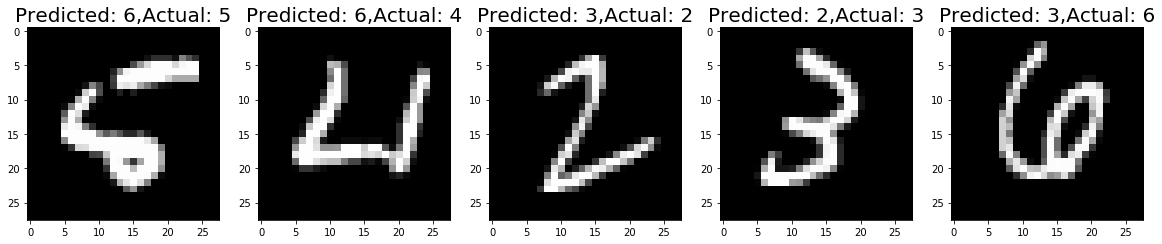

In [58]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndex[0:5]):
    plt.subplot(1,5,plotIndex+1)
    plt.imshow(np.reshape(test_img[badIndex],(28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {},Actual: {}'.format(predictions[badIndex],test_lbl[badIndex]),fontsize=20)